<a href="https://colab.research.google.com/github/ruchira2000/Mini-Project/blob/main/mini_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.85 s (started: 2021-06-19 12:27:27 +00:00)


In [138]:
!pip install bing-image-downloader

time: 2.84 s (started: 2021-06-19 12:27:30 +00:00)


In [139]:
!mkdir images 

mkdir: cannot create directory ‘images’: File exists
time: 128 ms (started: 2021-06-19 12:27:32 +00:00)


In [140]:
from bing_image_downloader import downloader
downloader.download("tulips",limit=20,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/tulips


[!!]Indexing page: 1

[%] Indexed 20 Images on Page 1.


[%] Downloading Image #1 from https://www.hadeco.co.za/wp-content/uploads/2018/02/elbo09319.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://4.bp.blogspot.com/-XPOjixGBu50/U16JVx9wqVI/AAAAAAAARic/jxPa-_87qis/s1600/Tulips1.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/originals/37/8c/04/378c04ba30b402514f39f36eb2b02799.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.birdsandblooms.com/wp-content/uploads/2020/09/Lilac-Wonder-tulip-scaled.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://s3-us-west-2.amazonaws.com/distiller-blog-prod/wp-content/uploads/2018/03/23143351/title8.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://3.bp.blogspot.com/-I7e7aWu0EyU/T18MTSjjMFI/AAAAAAAADBE/GyGWQUnK4XM/s1600/2+spring-flowers-yellow-tulips_all-hit-movies.blogspot.in.jpg
[%] File Downloaded !

[%] Do

In [141]:
# preprocessing 
import os 
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import  resize


time: 2.04 ms (started: 2021-06-19 12:27:38 +00:00)


In [142]:
target=[]
images=[]
flat_data = []


time: 2.72 ms (started: 2021-06-19 12:27:38 +00:00)


In [143]:
DATADIR = '/content/images'
CATEGORIES = ['rose','tulips']



time: 1.79 ms (started: 2021-06-19 12:27:38 +00:00)


In [144]:
for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array= imread(os.path.join(path,img))
    img_resized = resize(img_array,(200,200,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)



time: 13.4 s (started: 2021-06-19 12:27:38 +00:00)


In [145]:
flat_data= np.array(flat_data)
target= np.array(target)
images = np.array(images)

time: 31.5 ms (started: 2021-06-19 12:27:52 +00:00)


In [146]:
flat_data[0]

array([0.53333333, 0.83866422, 0.73670343, ..., 0.33333333, 0.54509804,
       0.41176471])

time: 7.69 ms (started: 2021-06-19 12:27:52 +00:00)


In [147]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

time: 6.67 ms (started: 2021-06-19 12:27:52 +00:00)


In [148]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(flat_data,target,test_size=0.3,random_state=107)

time: 16.1 ms (started: 2021-06-19 12:27:52 +00:00)


In [149]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
              {'C':[1,10,100,1000],'kernel':['linear']},
                {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
            ]
svc = svm.SVC(probability=True)
clf=GridSearchCV (svc,param_grid)
clf.fit(x_train,y_train)




GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 35.3 s (started: 2021-06-19 12:27:52 +00:00)


In [150]:
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1])

time: 68.7 ms (started: 2021-06-19 12:28:27 +00:00)


In [151]:
y_test

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1])

time: 3.66 ms (started: 2021-06-19 12:28:27 +00:00)


In [152]:
from sklearn.metrics import accuracy_score,confusion_matrix



time: 1.38 ms (started: 2021-06-19 12:28:27 +00:00)


In [153]:

accuracy_score(y_pred,y_test)

0.9166666666666666

time: 4.22 ms (started: 2021-06-19 12:28:27 +00:00)


In [154]:
confusion_matrix(y_pred,y_test)

array([[4, 0],
       [1, 7]])

time: 4.78 ms (started: 2021-06-19 12:28:27 +00:00)


In [155]:
import pickle

time: 3.02 ms (started: 2021-06-19 12:28:27 +00:00)


In [156]:
pickle.dump(clf,open('img_model.p','wb'))

time: 47.8 ms (started: 2021-06-19 12:28:27 +00:00)


In [157]:
model = pickle.load(open('img_model.p','rb'))

time: 18.5 ms (started: 2021-06-19 12:28:27 +00:00)


enter your URLhttps://www.chicagotribune.com/resizer/PhFKrx68lSB2Ru3ee4qXwmzSeXY=/1200x0/top/arc-anglerfish-arc2-prod-tronc.s3.amazonaws.com/public/JEHIXO5NFNEIVO3SVE6CGYMNL4.jpg
(798, 1200, 3)
predicted out : tulips


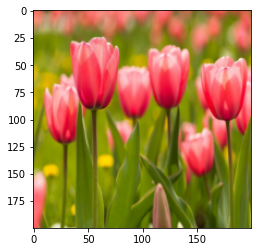

time: 5.09 s (started: 2021-06-19 12:32:29 +00:00)


In [162]:
flat_data=[]
URL = input('enter your URL')
img= imread(URL)
img_resized= resize(img,(200,200,3))
flat_data.append(img_resized.flatten())
flat_data= np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out= model.predict(flat_data)
y_out= CATEGORIES[y_out[0]]
print(f'predicted out : {y_out}')

